# Import libraries

In [ ]:
!git clone https://github.com/Vilmo18/apply_ML_AS.git
#!mv /content/apply_ML_AS/* /content/
#!rm -rf /content/apply_ML_AS

fatal: destination path 'apply_ML_AS' already exists and is not an empty directory.


In [5]:
import pandas as pd
ratings = pd.read_csv('ratings.csv')

In [7]:
dataframe = ratings
occurrences = (
            dataframe.groupby("movieId").size().reset_index(name="occurrences")
        )
occurrences

,movieId,occurrences
0,1,57309
1,2,24228
2,3,11804
3,4,2523
4,5,11714
...,...,...
59042,209157,1
59043,209159,1
59044,209163,1
59045,209169,1


In [8]:
occurrences.to_csv('occurences.csv')

In [1]:

#from google.colab.patches import cv2_imshow
#import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import requests
from sklearn.model_selection import train_test_split
from apply_ML_AS.preprocessing import *
from apply_ML_AS.utils import *


# Data Analysis

## Load data

## Look in our datasets

In [ ]:
#take a look at the training data
print('movies dataset shape : ',movies.shape)
print('rating dataset shape : ',ratings.shape)
print('link dataset shape : ',link.shape)
print('tags dataset shape : ',tags.shape,end="\n\n")

for df in [ratings, movies, link,tags]:
    print(df.head(3))
    print("++++++++++++++++++++")

#get a list of the features within the dataset
print("Movie : ", movies.columns,end="\n\n")
print("Rating : ", ratings.columns,end="\n\n")
print("Links : ", link.columns,end="\n\n")
print("Tags : ", tags.columns,end="\n\n")

movies.info()
ratings.info()
tags.info()

movies dataset shape :  (9742, 3)
rating dataset shape :  (100836, 4)
link dataset shape :  (9742, 3)
tags dataset shape :  (3683, 4)

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
++++++++++++++++++++
   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
++++++++++++++++++++
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
++++++++++++++++++++
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445

In [ ]:
# Dropping the timestamp column from ratings and tags file
ratings.drop(columns='timestamp',inplace=True)
tags.drop(columns='timestamp',inplace=True)

In [ ]:
## We visalise film and genre with one encoding method
movie=movies
genres=[]
for i in range(len(movie.genres)):
    for x in movie.genres[i].split('|'):
        if x not in genres:
            genres.append(x)

len(genres)
for x in genres:
    movie[x] = 0
for i in range(len(movie.genres)):
    for x in movie.genres[i].split('|'):
        movie[x][i]=1
movie

Streaming output truncated to the last 5000 lines.
<ipython-input-68-e31f6b8d1217>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie[x][i]=1
<ipython-input-68-e31f6b8d1217>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie[x][i]=1
<ipython-input-68-e31f6b8d1217>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie[x][i]=1
<ipython-input-68-e31f6b8d1217>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## We remove column genres
movie.drop(columns='genres',inplace=True)
movie.sort_index(inplace=True)

In [ ]:
movie

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Children    				664
Comedy    				3756
Fantasy    				779
Romance    				1596
Drama    				4361
Action    				1828
Crime    				1199
Thriller    				1894
Horror    				978
Mystery    				573
Sci-Fi    				980
War    				382
Musical    				334
Documentary    				440
IMAX    				158
Western    				167
Film-Noir    				87
(no genres listed)    				34


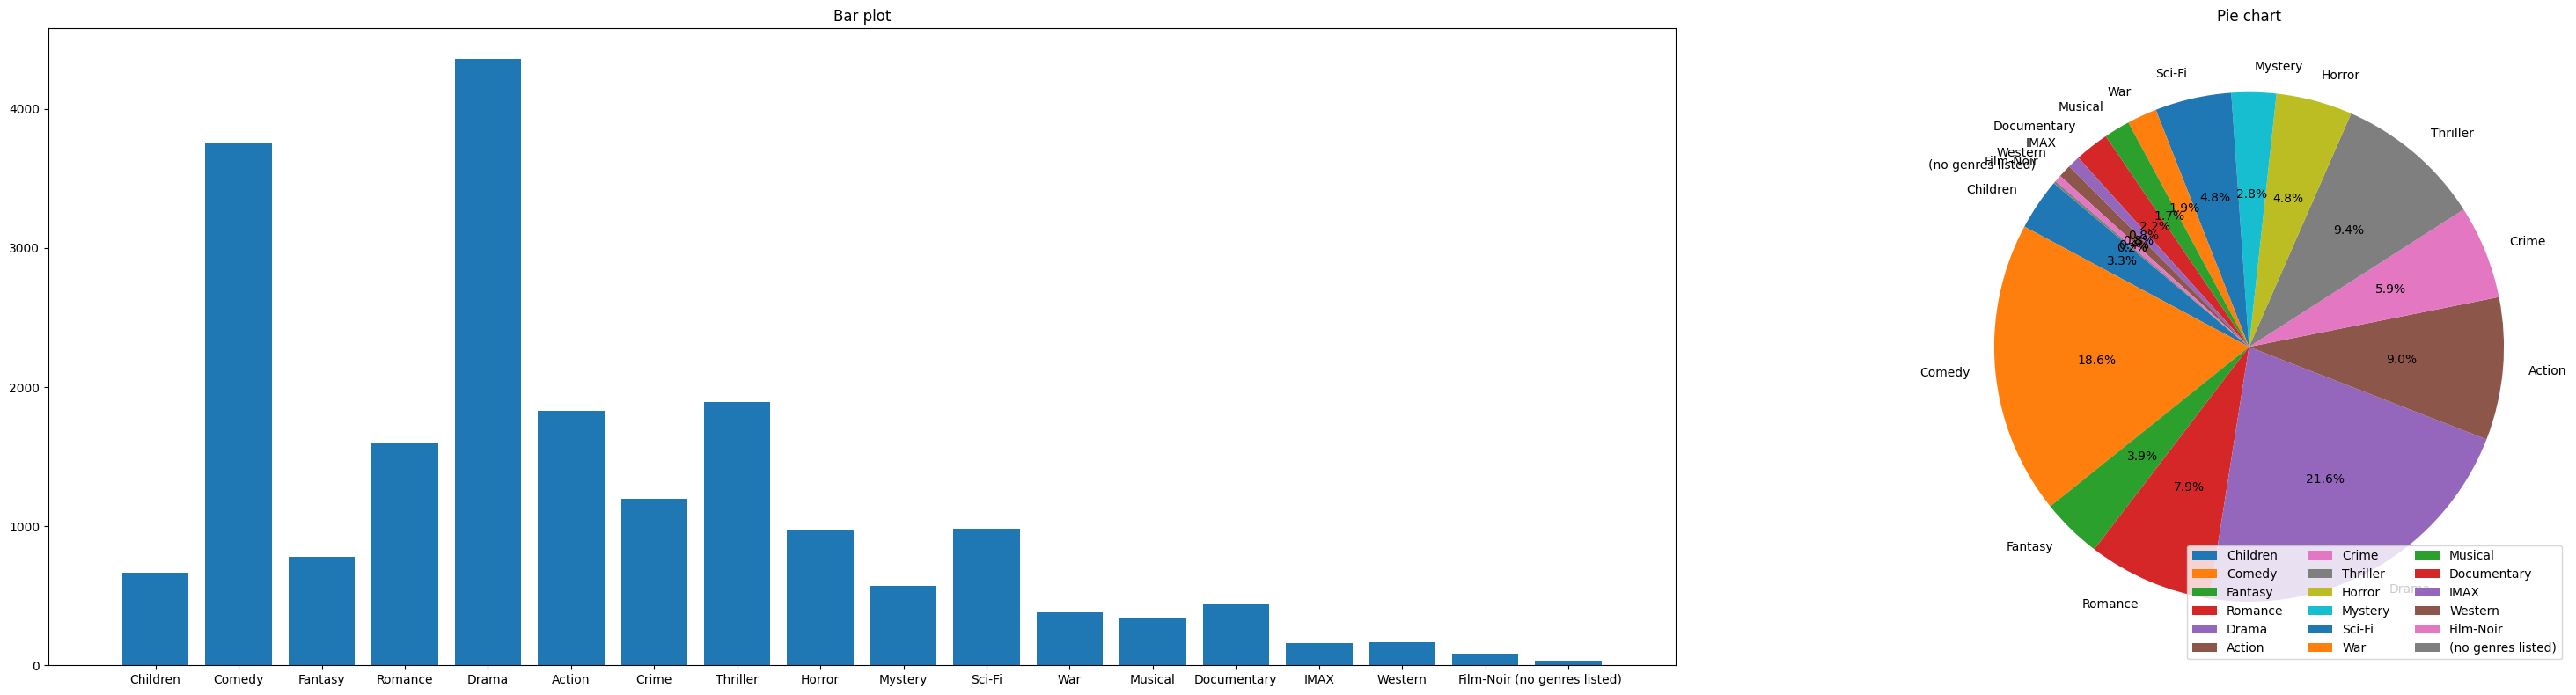

In [ ]:
x={}
for i in movie.columns[4:23]:
    x[i]=movie[i].value_counts()[1]
    print("{}    \t\t\t\t{}".format(i,x[i]))
## Plot the distribution of genre
plt.figure(figsize=(35, 8))

plt.subplot(1, 2, 1)
plt.bar(x.keys(), x.values())
plt.title('Bar plot')

plt.subplot(1, 2, 2)
plt.pie(x.values(), labels=x.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Pie chart')
plt.legend(x.keys(), loc="best",ncol=3)

plt.tight_layout()
plt.show()

In [ ]:
#Add a Column `rating` in movie DF and assign them with the Mean Movie Rating for that Movie.
x=ratings.groupby('movieId').rating.mean()
movie = pd.merge(movie,x,how='outer',on='movieId')
movie['rating'].fillna('0',inplace=True)

In [ ]:
# Now Lets group all the ratings with respect to movieId and count the no of Users
x = ratings.groupby('movieId',as_index=False).userId.count()
x.sort_values('userId',ascending=False,inplace=True)
y = pd.merge(movie,x,how='outer',on='movieId')
y.drop(columns=[i for i in movie.columns[2:22]],inplace=True)
y.sort_values(['userId','rating'],ascending=False)

,movieId,title,rating,userId
314,356,Forrest Gump (1994),4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",4.429022,317.0
257,296,Pulp Fiction (1994),4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",4.16129,279.0
1939,2571,"Matrix, The (1999)",4.192446,278.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),0,NaN
5824,32160,Twentieth Century (1934),0,NaN
5837,32371,Call Northside 777 (1948),0,NaN
5957,34482,"Browning Version, The (1951)",0,NaN


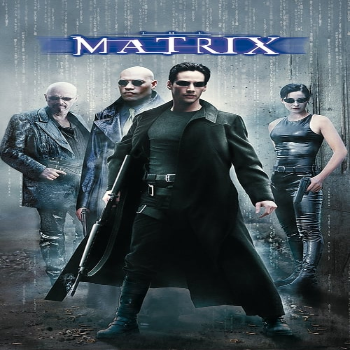

Matrix, The (1999)


In [ ]:
id=2571
display_image_title_movie(id,link,movies)

In [ ]:
#find the user with highest no.of. movie ratings and that users mean rating.
x = ratings.groupby('userId',as_index=False).movieId.count()
y = ratings.groupby('userId',as_index=False).rating.mean()
x = pd.merge(x,y,how='outer',on='userId')

In [ ]:
x.describe()

,userId,movieId,rating
count,610.000000,610.000000,610.000000
mean,305.500000,165.304918,3.657222
std,176.236111,269.480584,0.480635
min,1.000000,20.000000,1.275000
25%,153.250000,35.000000,3.360000
50%,305.500000,70.500000,3.694385
75%,457.750000,168.000000,3.997500
max,610.000000,2698.000000,5.000000


In [ ]:
x.sort_values('movieId',ascending=False)

,userId,movieId,rating
413,414,2698,3.391957
598,599,2478,2.642050
473,474,2108,3.398956
447,448,1864,2.847371
273,274,1346,3.235884
...,...,...,...
441,442,20,1.275000
568,569,20,4.000000
319,320,20,3.525000
575,576,20,3.100000


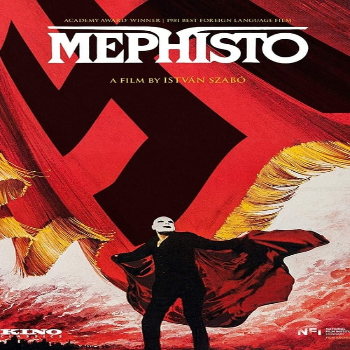

Mephisto (1981)


In [ ]:
display_image_title_movie(2075,link,movies)

# Preprocessing

In [2]:
movies = pd.read_csv('apply_ML_AS/movies.csv')
link = pd.read_csv('apply_ML_AS/links.csv')

In [4]:
display_image_title_movie(10, link, movies)

L'image a été téléchargée avec succès.


GoldenEye (1995)


In [33]:
dico = np.load('movies_mapping.npy', allow_pickle=True).item()
len(dico)

59047

In [3]:
def get_data(folder):
    DIR = os.getcwd()
    data_path = f"{DIR}/DATA/{folder}"

    # Creating embedings if it yet to be saved in memeory
    if not (os.path.isfile(f"{data_path}/{compress_filename}")):

        # movies_df = pd.read_csv(f'{data_path}/movies.csv')
        ratings_df = pd.read_csv(f'{data_path}/ratings.csv')
        # tags_df = pd.read_csv(f'{data_path}/tags.csv')

        rating_arr = ratings_df[['userId','movieId','rating']].to_numpy()
        train , test, unique_user_ids, unique_movie_ids = train_test_split(rating_arr)

        #create Data embdings for user and items
        train_uv = create_UV(train,unique_user_ids, unique_movie_ids)
        test_uv = create_UV(test, unique_user_ids, unique_movie_ids)

        #saving embeddings
        data = save_embedings(train_uv,test_uv,data_path)
        train_uv = data['train']
        test_uv = data['test']
    else:
        data = read_embeddings(f"{data_path}/{compress_filename}")
        train_uv = data['train']
        test_uv = data['test']

    return train_uv, test_uv
def train_test_split(data,test=0.1,seed=42):
    user_ids, movie_ids, user_ratings = data.T

    # getting unique user IDs and movie IDs
    unique_user_ids = np.unique(user_ids)
    unique_movie_ids = np.unique(movie_ids)

    # Making Data random
    rng = np.random.default_rng(43)
    rng.shuffle(data)

    test_num = int(test * len(data))

    test = data[:test_num+1, :]
    train = data[test_num+1:, :]

    return train, test, unique_user_ids, unique_movie_ids

def create_UV(rating_arr,unique_user_ids,unique_movie_ids):

    #sorting according to user and movies
    user_sort = rating_arr[rating_arr[:, 0].argsort()]
    movies_sort = rating_arr[rating_arr[:, 1].argsort()]

    # separating user and movie IDs and ratings
    user_ids, user_movie_ids, user_ratings = user_sort.T
    movie_user_ids, movie_movie_ids, movie_ratings = movies_sort.T

    # getting unique user IDs and movie IDs
    # unique_user_ids = np.unique(user_ids)
    # unique_movie_ids = np.unique(movie_movie_ids)

    # mapping Ids to rating map
    user_to_idx = {int(user_id): idx for idx, user_id in enumerate(unique_user_ids)}
    movie_to_idx = {int(movie_id): idx for idx, movie_id in enumerate(unique_movie_ids)}

    # mapping
    user_to_rating = [[] for _ in unique_user_ids]
    movie_to_rating = [[] for _ in unique_movie_ids]

    for user_id, movie_id, rating in tqdm(zip(user_ids, user_movie_ids, user_ratings)):
        user_idx = user_to_idx[int(user_id)]
        movie_idx = movie_to_idx[int(movie_id)]
        user_to_rating[user_idx].append((movie_idx, rating))
        movie_to_rating[movie_idx].append((user_idx, rating))

    return user_to_idx, movie_to_idx, user_to_rating, movie_to_rating

In [4]:
ratings = pd.read_csv('apply_ML_AS/ratings.csv')
rating_arr = ratings[['userId','movieId','rating']].to_numpy()
train , test, unique_user_ids, unique_movie_ids = train_test_split(rating_arr)

        #create Data embdings for user and items
index_mapping_user,index_mapping_movie,users_train, movies_train = create_UV(train,unique_user_ids, unique_movie_ids)
_,_,users_test, movies_test = create_UV(test, unique_user_ids, unique_movie_ids)

22500085it [00:15, 1416397.83it/s]
2500010it [00:01, 1620904.33it/s]


In [14]:
import pandas as pd

def movie_ids_less_than_30_occurrences(dataframe):
    # Grouper par 'movieId' et compter les occurrences
    occurrences = dataframe.groupby('movieId').size().reset_index(name='occurrences')
    # Filtrer les movieIds ayant moins de 30 occurrences
    less_than_30_occurrences = occurrences[occurrences['occurrences'] < 150]['movieId'].tolist()
    return less_than_30_occurrences

less_than_30_occurrences_ids = movie_ids_less_than_30_occurrences(ratings)
print(less_than_30_occurrences_ids)


[33, 37, 51, 53, 56, 84, 98, 106, 108, 109, 115, 120, 127, 128, 130, 133, 134, 136, 138, 139, 142, 143, 167, 192, 197, 226, 284, 285, 286, 311, 385, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 406, 411, 439, 503, 526, 530, 559, 560, 566, 572, 576, 579, 582, 584, 591, 598, 601, 604, 607, 614, 620, 623, 625, 629, 636, 641, 642, 643, 644, 649, 651, 652, 654, 655, 657, 658, 660, 672, 675, 676, 679, 682, 683, 684, 687, 690, 693, 696, 698, 699, 701, 713, 717, 721, 723, 727, 729, 730, 734, 738, 739, 744, 749, 752, 755, 756, 758, 763, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 787, 789, 790, 791, 792, 793, 794, 795, 796, 797, 812, 814, 815, 816, 819, 820, 821, 822, 823, 825, 826, 843, 845, 847, 853, 855, 856, 857, 859, 864, 865, 868, 871, 872, 873, 874, 878, 884, 887, 889, 890, 894, 895, 925, 939, 958, 962, 966, 972, 974, 975, 977, 979, 980, 983, 985, 989, 1001, 1002, 1026, 1039, 1040, 1045, 1052, 1058, 1062, 1063, 1065, 1067, 1070, 1071, 1075, 1098, 1102, 1106, 1107, 1109, 1

In [7]:
index_mapping_movie[44]

43

In [8]:
index_mapping_movie = np.load('movies_mapping.npy', allow_pickle=True).item()
movies_vector=np.load('movies.npy')
item_biases = np.load('m_bias.npy')
movies_vector.shape

(1, 59047)

In [17]:
users_predict=[(5840,5.0)]#4887
k=2

lamb=5
tau=2e-1
gamma=1e-2

In [18]:

#lamb=5
#tau=0.4
#gamma=2e-1

def generate_user_vector(users_predict,movies_vector,item_biases,lamb=lamb,tau=tau,gamma=gamma,iteration=1000,k=k):
    user_new = np.random.normal(0,1/np.sqrt(k), (k))
    user_bias_new = 0
    for _ in tqdm(range(iteration)):
        biais = 0
        item_counter = 0
        for n, r in users_predict:
            biais += r - np.dot(user_new, movies_vector.T[n]) - item_biases[n]
            item_counter += 1

        biais *= lamb
        biais = biais / (lamb * item_counter + gamma)
        user_bias_new = biais

        left_val = 0
        right_val = 0
        for n, r in users_predict:
            left_val += movies_vector.T[n] * movies_vector.T[n].reshape(-1, 1)
            right_val += movies_vector.T[n] * (r - user_bias_new - item_biases[n])

        left_val *= lamb
        user_new = np.linalg.solve(left_val + tau * np.eye(k), lamb * right_val)

    return user_new,user_bias_new

In [19]:
def find_key_by_values(dictionnaire, valeur_recherchee):
    for cle, valeur in dictionnaire.items():
        if valeur == valeur_recherchee:
            return cle
    raise ValueError("La valeur spécifiée n'existe pas dans le dictionnaire")

def find_id_per_title(dataframe, titre_recherche):
    row = dataframe[dataframe["title"] == titre_recherche]
    if not row.empty:
        return row.iloc[0]["movieId"]
    else:
        return None
#find_id_per_title(movies,'Naruto the Movie: Legend of the Stone of Gelel (2005)')

def prediction(user_new,user_bias_new,movies_vector,item_biases):
    n=movies_vector.shape[1]
    predict=[]
    for i in tqdm(range(n)):
        predict.append(np.dot(user_new, movies_vector.T[i]) +1*item_biases[i] + user_bias_new)
    recommender = np.argsort(predict)[::-1]
    recommender=recommender[:2000]
    rec=[]
    for i in recommender:
        key=find_key_by_values(index_mapping_movie,i)
        if key not in less_than_30_occurrences_ids:
            rec.append(key)
        

    return rec


In [20]:
user_new,user_bias_new=generate_user_vector(users_predict,movies_vector,item_biases)
index=prediction(user_new,user_bias_new,movies_vector,item_biases)

100%|██████████| 59047/59047 [00:00<00:00, 1157938.61it/s]


In [21]:
for i in index:
    print(map_movie_id_title(i, movies),map_movie_id_genre(i, movies))

Planet Earth II (2016) Documentary
Planet Earth (2006) Documentary
Band of Brothers (2001) Action|Drama|War
Life (2009) Documentary
Shawshank Redemption, The (1994) Crime|Drama
Blue Planet II (2017) Documentary
The Adventures of Sherlock Holmes and Dr. Watson: Bloody Signature (1979) Crime
Cosmos: A Spacetime Odissey (no genres listed)
The Blue Planet (2001) Documentary
Sherlock Holmes and Dr. Watson: Acquaintance (1979) Crime
Human Planet (2011) Documentary
Cosmos (no genres listed)
There Once Was a Dog (1982) Animation|Children|Comedy
Godfather, The (1972) Crime|Drama
Schindler's List (1993) Drama|War
Last Year's Snow Was Falling (1983) Animation|Children|Comedy|Fantasy
Over the Garden Wall (2013) Adventure|Animation|Drama
Usual Suspects, The (1995) Crime|Mystery|Thriller
Operation 'Y' & Other Shurik's Adventures (1965) Comedy|Crime|Romance
Civil War, The (1990) Documentary|War
Look of Silence, The (2014) Documentary


In [27]:
index_mapping_movie[1]

0

In [7]:
k=2

user_biases = np.zeros((len(index_mapping_user)))
item_biases = np.zeros((len(index_mapping_movie)))
users_vector=np.random.normal(0,1/np.sqrt(k),(len(index_mapping_user),k))
movies_vector=np.random.normal(0,1/np.sqrt(k),(k,len(index_mapping_movie)))

M=len(index_mapping_user)
N= len(index_mapping_movie)

lamb=5
tau=2e-1
gamma=1e-2

loss=[]
res=[]
cout1=[]
error=[]


In [8]:

def loss_cost_rms(users_map,users_vector,movies_vector,item_biases,user_biases,lamb,tau,gamma):
    result=0
    count=0
    M=len(users_map)
    for m in range(M):
      for (n,r) in users_map[m]:
        result+=(r-np.dot(users_vector[m],movies_vector.T[n])-item_biases[n]-user_biases[m])**2
        count+=1
    loss=result*lamb
    loss+=gamma*(np.sum(item_biases**2))+gamma*np.sum((user_biases**2))+ tau*(np.einsum('ij,ij->',users_vector,users_vector)) + tau*(np.einsum('ij,ij->',movies_vector.T,movies_vector.T))
    loss=loss/2
    rms=np.sqrt(result/count)
    return loss,rms

In [9]:
for _ in tqdm(range(24)):
    for m in range(M):
        biais = 0
        item_counter = 0
        for n, r in users_train[m]:
            biais += r - np.dot(users_vector[m], movies_vector.T[n]) - item_biases[n]
            item_counter += 1

        biais *= lamb
        biais = biais / (lamb * item_counter + gamma)
        user_biases[m] = biais

    for m in range(M):
        left_val = 0
        right_val = 0

        for n, r in users_train[m]:
            left_val += movies_vector.T[n] * movies_vector.T[n].reshape(-1, 1)
            right_val += movies_vector.T[n] * (r - user_biases[m] - item_biases[n])

        left_val *= lamb
        users_vector[m] = np.linalg.solve(left_val + tau * np.eye(k), lamb * right_val)

    for n in range(N):
        biais = 0
        user_counter = 0
        for m, r in movies_train[n]:
            biais += r - np.dot(users_vector[m], movies_vector.T[n]) - user_biases[m]
            user_counter += 1

        biais *= lamb
        biais = biais / (lamb * user_counter + gamma)
        item_biases[n] = biais

    for n in range(N):
        left_val = 0
        right_val = 0
        if len(movies_train[n])>0:
          for m, r in movies_train[n]:
              left_val += users_vector[m] * users_vector[m].reshape(-1, 1)
              right_val += users_vector[m] * (r - user_biases[m] - item_biases[n])

          left_val *= lamb
          movies_vector.T[n] = np.linalg.solve(
              left_val + tau * np.eye(k), lamb * right_val
          )
    cost, rms = loss_cost_rms(
        users_train,
        users_vector,
        movies_vector,
        item_biases,
        user_biases,
        lamb,
        tau,
        gamma,
    )
    cost1, rms1 = loss_cost_rms(
        users_test,
        users_vector,
        movies_vector,
        item_biases,
        user_biases,
        lamb,
        tau,
        gamma,
    )
    loss.append(cost)
    res.append(rms)
    cout1.append(cost1)
    error.append(rms1)
    print(rms)
    print(rms1)

  4%|▍         | 1/24 [02:56<1:07:37, 176.40s/it]

0.8594484542963072
0.8826917603303931


  8%|▊         | 2/24 [05:52<1:04:40, 176.41s/it]

0.8256616381469389
0.8521491014718304


 12%|█▎        | 3/24 [08:48<1:01:35, 175.98s/it]

0.8088309710265847
0.835852228719107


 17%|█▋        | 4/24 [11:44<58:37, 175.89s/it]  

0.8010835508373565
0.8282764237290264


 21%|██        | 5/24 [14:39<55:38, 175.69s/it]

0.7970593577620705
0.824269056314194


 25%|██▌       | 6/24 [17:36<52:51, 176.21s/it]

0.7946239421699209
0.8218334357149022


 29%|██▉       | 7/24 [20:32<49:52, 176.02s/it]

0.7930916197317777
0.8203147152102226


 33%|███▎      | 8/24 [23:27<46:54, 175.91s/it]

0.7921130545722694
0.8193511674789606


 38%|███▊      | 9/24 [26:23<43:55, 175.70s/it]

0.7914603657535234
0.8187125047205105


 42%|████▏     | 10/24 [29:17<40:55, 175.37s/it]

0.7910071555661887
0.8182878538191227


 46%|████▌     | 11/24 [32:13<38:00, 175.42s/it]

0.7906886627230856
0.8180070062380442


 50%|█████     | 12/24 [35:08<35:05, 175.47s/it]

0.7904686770985841
0.8178222790792156


 54%|█████▍    | 13/24 [38:07<32:20, 176.41s/it]

0.7903151513212204
0.8176920556678777


 58%|█████▊    | 14/24 [41:15<29:58, 179.85s/it]

0.7902020674605459
0.8175989488078977


 62%|██████▎   | 15/24 [44:25<27:27, 183.01s/it]

0.7901152884459078
0.8175295103834391


 67%|██████▋   | 16/24 [47:35<24:39, 184.99s/it]

0.790046424822398
0.8174845830742262


 71%|███████   | 17/24 [50:47<21:49, 187.09s/it]

0.7899907162000444
0.8174560834869778


 75%|███████▌  | 18/24 [53:57<18:48, 188.09s/it]

0.7899459440773924
0.8174374944229787


 79%|███████▉  | 19/24 [57:07<15:43, 188.78s/it]

0.7899096221783342
0.8174255726944211


 83%|████████▎ | 20/24 [1:00:09<12:27, 186.76s/it]

0.7898794309817865
0.817423354582747


 88%|████████▊ | 21/24 [1:03:09<09:13, 184.55s/it]

0.7898541110344351
0.8174224592759676


 92%|█████████▏| 22/24 [1:06:09<06:06, 183.21s/it]

0.7898334855969528
0.8174186843661321


 96%|█████████▌| 23/24 [1:09:09<03:02, 182.30s/it]

0.7898159344925677
0.8174132619951968


100%|██████████| 24/24 [1:12:17<00:00, 180.71s/it]

0.7898002825162667
0.8174079121534563


In [22]:
np.save('plot_emb.npy', movies_vector)

In [ ]:
plt.plot(loss)
plt.show()

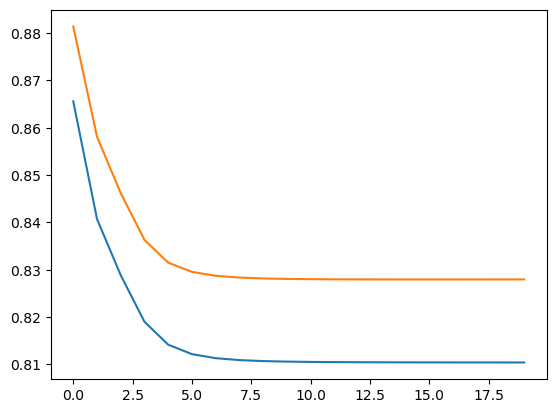

In [ ]:
plt.plot(res)
plt.plot(error)
plt.show()

In [ ]:
loaded_array1 = np.load('movies_mapping.npy', allow_pickle=True).item()
loaded_array1

In [ ]:
np.save('users.npy',users_vector)
np.save('movies.npy', movies_vector)
np.save('m_bias.npy', item_biases)

'''

# Load the arrays
loaded_array1 = np.load('array1.npy')
loaded_array2 = np.load('array2.npy')
loaded_array3 = np.load('array3.npy')
'''
loaded_array1 = np.load('m_bias.npy')
# Test if loading was successful
print("Loaded Array 1:", loaded_array1)


Loaded Array 1: [ 0.32123645 -0.40127415 -0.60761116 ...  1.04325371 -0.41201634
  0.        ]


# Plot rating distribution

In [ ]:
plot_rating(ratings)